# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:

data = pd.DataFrame({'X': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Y': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})
data.head()

,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4


Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot: xlabel='X', ylabel='Y'>

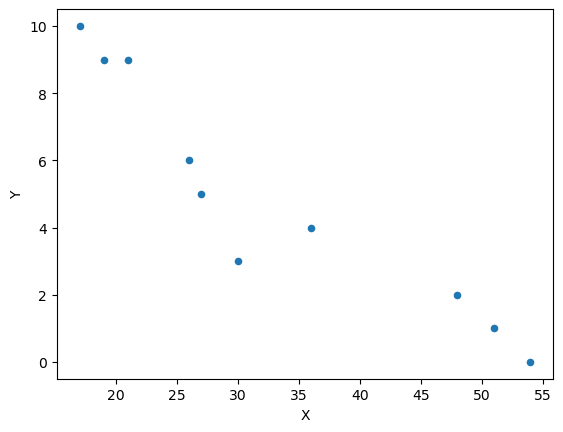

In [20]:
data.plot.scatter(x='X', y='Y')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [21]:
X = data['X'].values
Y = data['Y'].values

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [22]:
data.corr()

,X,Y
X,1.000000,-0.939163
Y,-0.939163,1.000000


In [23]:
data.cov()

,X,Y
X,187.655556,-45.566667
Y,-45.566667,12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [24]:
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import RandomForestClassifier as RFC
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [25]:
x=sm.add_constant(X)

y=Y

modelo=sm.OLS(y, x).fit()
pred=modelo.predict(x)

modelo.summary()

c:\Users\jorge\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Wed, 01 Mar 2023   Prob (F-statistic):           5.57e-05
Time:                        15:29:21   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.000      10.328      15.450
x1            -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Plot your regression model on your scatter plot.

array([12.88880336, -0.24282077])

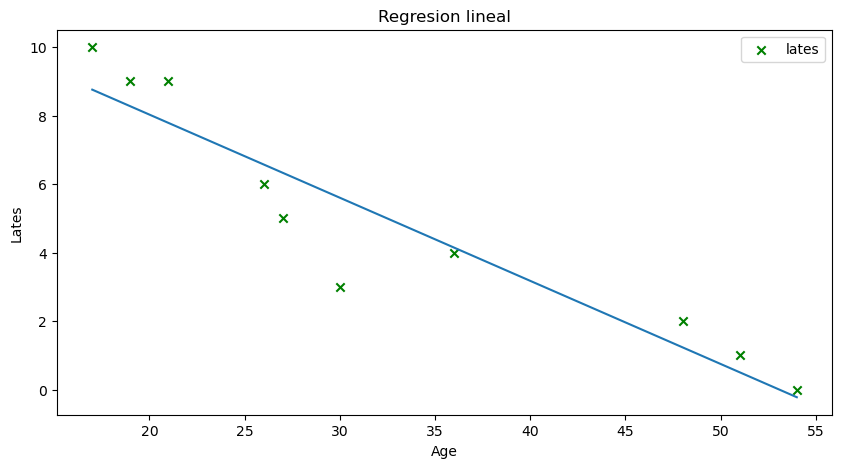

In [31]:
x=np.linspace(X.min(), X.max())
y=modelo.params[1]*x + modelo.params[0]

plt.figure(figsize=(10, 5))

# la recta de ajuste
plt.plot(x, y)

# datos
plt.scatter(X, Y, marker='x', c='g', label='lates')

plt.title('Regresion lineal')
plt.xlabel('Age')
plt.ylabel('Lates')
plt.legend()
plt.show();

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [32]:
modelo.rsquared

0.8820265558250109

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [33]:
veh = pd.read_csv('vehicles.csv')
veh.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [34]:
veh.corr()

C:\Users\jorge\AppData\Local\Temp\ipykernel_17336\2146852230.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  veh.corr()


,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.037876,0.082469,-0.221084,0.161818,0.267259,0.204751,-0.222300,-0.091913
Engine Displacement,0.037876,1.000000,0.901858,0.789752,-0.740317,-0.715039,-0.746782,0.803520,0.769678
Cylinders,0.082469,0.901858,1.000000,0.739517,-0.703866,-0.650287,-0.698648,0.752393,0.778153
Fuel Barrels/Year,-0.221084,0.789752,0.739517,1.000000,-0.877752,-0.909664,-0.909743,0.986189,0.916208
City MPG,0.161818,-0.740317,-0.703866,-0.877752,1.000000,0.923856,0.985457,-0.894139,-0.858645
Highway MPG,0.267259,-0.715039,-0.650287,-0.909664,0.923856,1.000000,0.969392,-0.926405,-0.851404
Combined MPG,0.204751,-0.746782,-0.698648,-0.909743,0.985457,0.969392,1.000000,-0.926229,-0.875185
CO2 Emission Grams/Mile,-0.222300,0.803520,0.752393,0.986189,-0.894139,-0.926405,-0.926229,1.000000,0.930865
Fuel Cost/Year,-0.091913,0.769678,0.778153,0.916208,-0.858645,-0.851404,-0.875185,0.930865,1.000000


In [ ]:
['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year']

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [36]:
x=sm.add_constant(veh[[
    
    'Year',
    'Cylinders',
    'Engine Displacement',
    'Fuel Barrels/Year',
    'City MPG',
    'Highway MPG',
    'Combined MPG',
    'Fuel Cost/Year'
    
]].apply(lambda x: x.fillna(x.mean()))

)

y=veh['CO2 Emission Grams/Mile']


modelo=sm.OLS(y, x).fit()

pred=modelo.predict(x)

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.983
Model:                                 OLS   Adj. R-squared:                  0.983
Method:                      Least Squares   F-statistic:                 2.559e+05
Date:                     Wed, 01 Mar 2023   Prob (F-statistic):               0.00
Time:                             15:38:11   Log-Likelihood:            -1.4987e+05
No. Observations:                    35952   AIC:                         2.998e+05
Df Residuals:                        35943   BIC:                         2.998e+05
Df Model:                                8                                         
Covariance Type:                 nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 764.3433     18.897     40.448      0.000     727.304     801.382
Year                   -0.3066      0.009    -32.300      0.000      -0.325      -0.288
Cylinders              -1.1563      0.120     -9.649      0.000      -1.391      -0.921
Engine Displacement     6.6593      0.160     41.543      0.000       6.345       6.974
Fuel Barrels/Year      17.4507      0.064    274.510      0.000      17.326      17.575
City MPG                0.8706      0.156      5.585      0.000       0.565       1.176
Highway MPG            -2.4132      0.089    -27.094      0.000      -2.588      -2.239
Combined MPG           -1.3730      0.229     -5.991      0.000      -1.822      -0.924
Fuel Cost/Year          0.0376      0.000     80.102      0.000       0.037       0.038
==============================================================================
Omnibus:                    65974.989   Durbin-Watson:                   0.785
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        162004990.275
Skew:                          13.520   Prob(JB):                         0.00
Kurtosis:                     330.744   Cond. No.                     6.36e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.36e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [39]:
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.preprocessing import StandardScaler

In [40]:
X=veh.drop('CO2 Emission Grams/Mile', axis=1)._get_numeric_data()

y=veh['CO2 Emission Grams/Mile']

In [41]:
modelo=LinReg()

modelo.fit(X, y)

LinearRegression()

In [43]:
X_norm=StandardScaler().fit_transform(X)

linreg=LinReg().fit(X_norm, y)
dict(zip(X.columns, linreg.coef_))

{'Year': -3.091876550033878,
 'Engine Displacement': 9.052538259826505,
 'Cylinders': -2.0296554005549923,
 'Fuel Barrels/Year': 77.95607276562323,
 'City MPG': 4.15192138365381,
 'Highway MPG': -14.215788307323434,
 'Combined MPG': -7.019010073073946,
 'Fuel Cost/Year': 19.050352681454985}

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

In [50]:
X = [1,3,4,6,8,9,11,14]
Y = [1,2,4,4,5,7,8,13]
party = pd.DataFrame({'X': X, 'Y': Y})
X = party['X'].values
Y = party['Y'].values

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

<AxesSubplot: xlabel='X', ylabel='Y'>

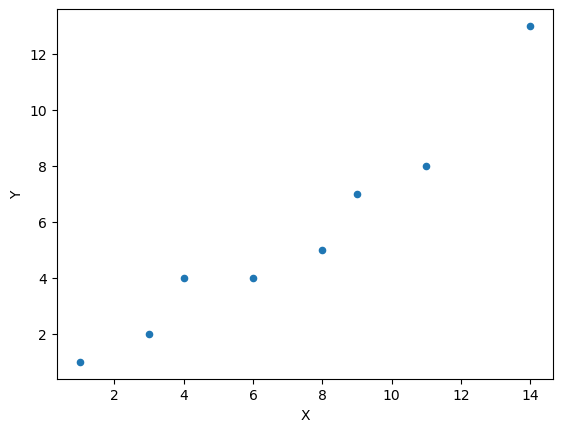

In [51]:
party.plot.scatter(x='X', y='Y')

In [52]:
x=sm.add_constant(X)

y=Y

modelo=sm.OLS(y, x).fit()
pred=modelo.predict(x)

modelo.summary()

c:\Users\jorge\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Wed, 01 Mar 2023   Prob (F-statistic):           0.000102
Time:                        15:47:00   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4394      0.759     -0.579      0.584      -2.297       1.418
x1             0.8485      0.094      9.045      0.000       0.619       1.078
==============================================================================
Omnibus:                        0.556   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.757   Jarque-Bera (JB):                0.514
Skew:                           0.261   Prob(JB):                        0.773
Kurtosis:                       1.873   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

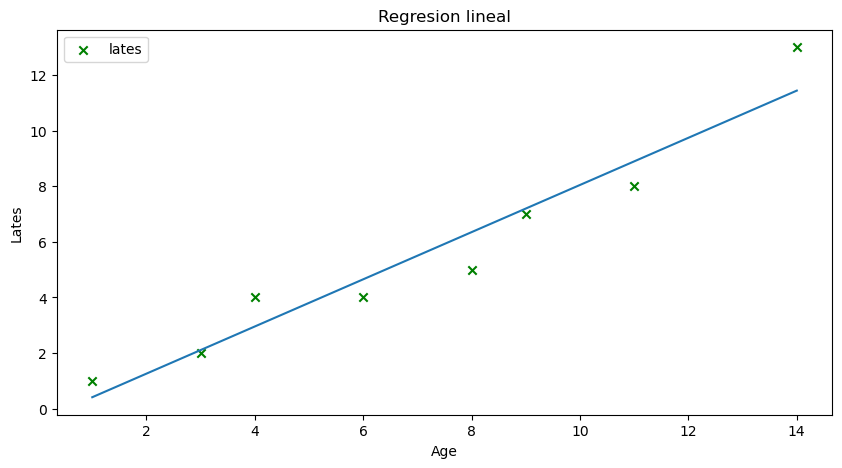

In [53]:
x=np.linspace(X.min(), X.max())
y=modelo.params[1]*x + modelo.params[0]

plt.figure(figsize=(10, 5))

# la recta de ajuste
plt.plot(x, y)

# datos
plt.scatter(X, Y, marker='x', c='g', label='lates')

plt.title('Regresion lineal')
plt.xlabel('Age')
plt.ylabel('Lates')
plt.legend()
plt.show();

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [54]:
modelo.rsquared

0.9316696375519905

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 